In [1]:
!pip install opencv-python matplotlib numpy

In [2]:
%matplotlib inline

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

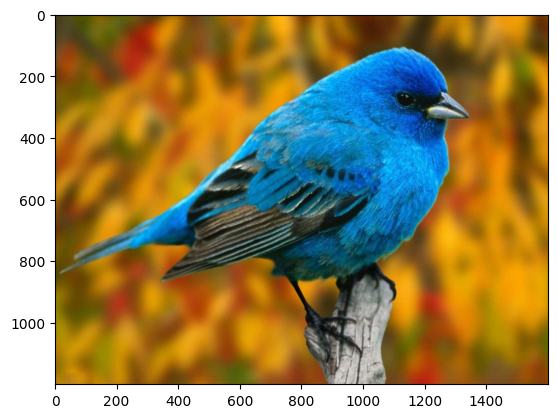

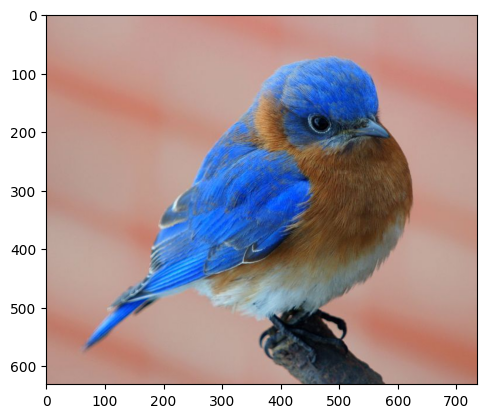

In [4]:
train_img = cv2.imread("img.jpeg")
query_img = cv2.imread("img2.jpeg")

plt.imshow(cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB))
plt.show()

- найти все orb features точки на изображении

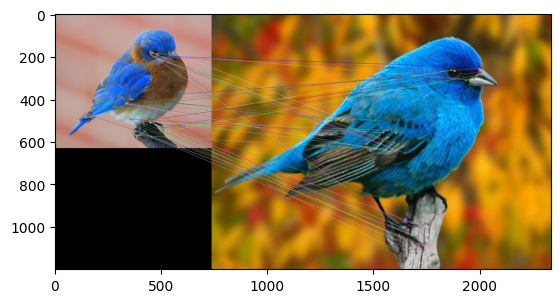

In [5]:
# Converting image to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY) 
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
   
# ORB detector algorithm 
orb = cv2.ORB_create() 
   
# Detect the keypoints and compute the descriptors
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher and match the keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# Draw the matches to the final image 
final_img = cv2.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:50],None) 

plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.show()

- найти все sift features точки на изображении

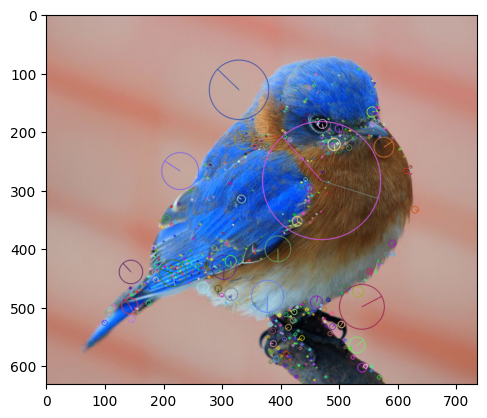

In [6]:
# Converting image to grayscale
gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
 
# SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
 
# Marking the keypoint on the image using circles
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(query_img, kp, gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS), cv2.COLOR_BGR2RGB))
plt.show()

- найти canny edges на изображенни

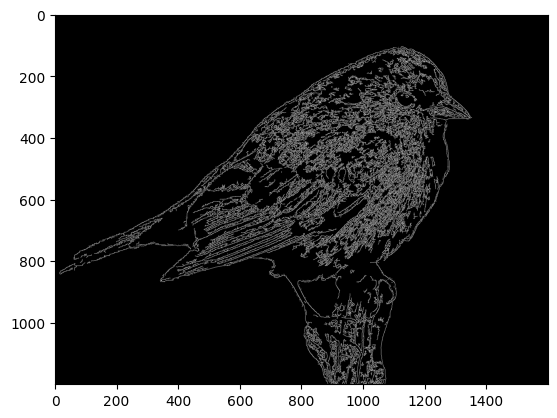

In [7]:
# Setting parameter values 
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 

# Applying the Canny Edge filter 
edge = cv2.Canny(train_img, t_lower, t_upper) 

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.show()

- перевести в grayscale

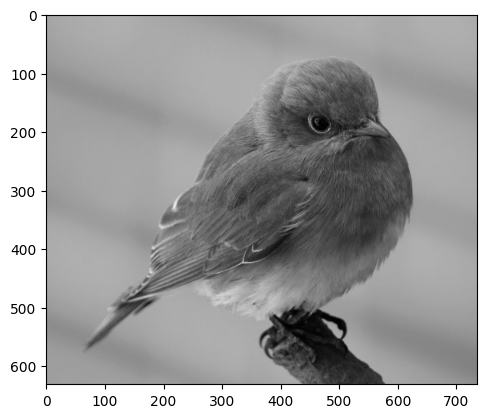

In [8]:
gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

- перевести изорбражение в hsv

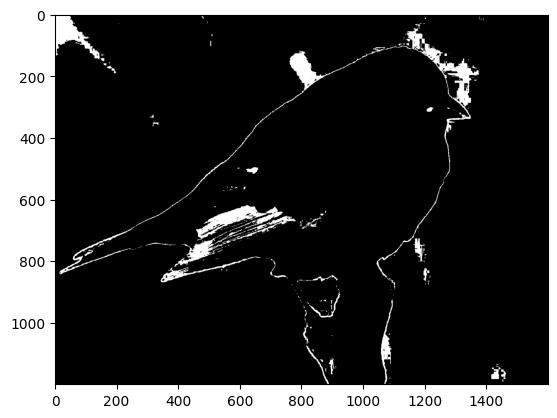

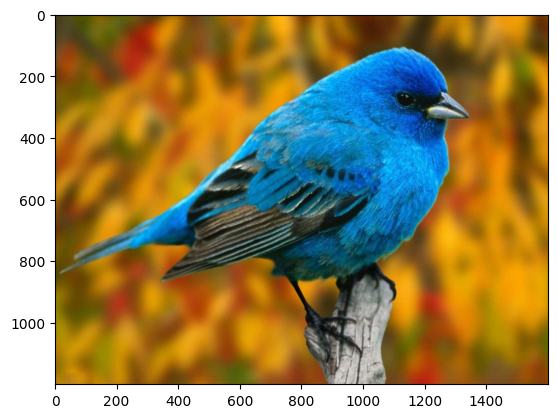

In [9]:
def fixHSVRange(h, s, v):
    # Normal H,S,V: (0-360,0-100%,0-100%)
    # OpenCV H,S,V: (0-180,0-255 ,0-255)
    return (180 * h / 360, 255 * s / 100, 255 * v / 100)

img_hsv = cv2.cvtColor(train_img, cv2.COLOR_BGR2HSV)
color1 = fixHSVRange(h=10, s=20, v=20)
color2 = fixHSVRange(h=80, s=70, v=100)
mask = cv2.inRange(img_hsv, color1, color2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB))
plt.show()

- отразить изображение по правой границе

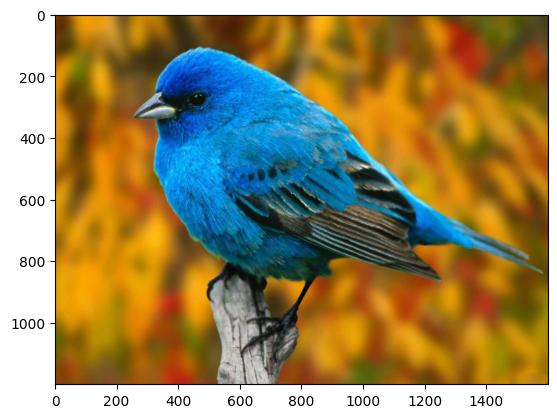

In [10]:
flip = cv2.flip(train_img, 2)
plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB))
plt.show()

- отразить изображение по нижней границе

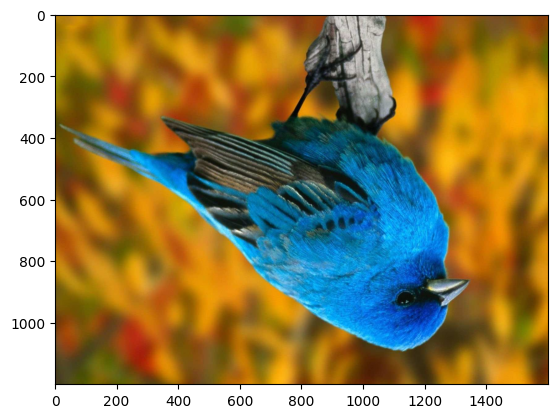

In [11]:
flip = cv2.flip(train_img, 0)
plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB))
plt.show()

- повернуть изображение на 45 градусов

In [12]:
def rotate_image(image, angle, dot):
  rot_mat = cv2.getRotationMatrix2D(dot, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

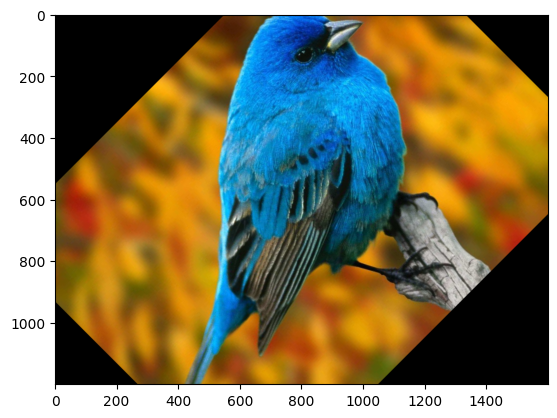

In [13]:
image_center = tuple(np.array(train_img.shape[1::-1]) / 2)
rotated_img = rotate_image(train_img, 45, image_center)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.show()

- повернуть изображение на 30 градусов вокруг заданной точки

[100. 100.]


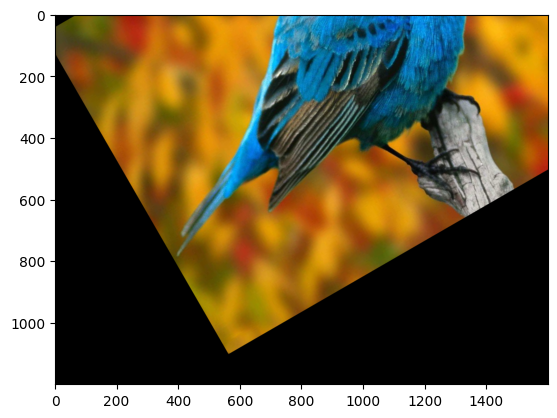

In [14]:
dot = np.array([100, 100], dtype=float)
print(dot)
rotated_img = rotate_image(train_img, 30, dot)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.show()

- сместить изображение но 10 пикселей вправо

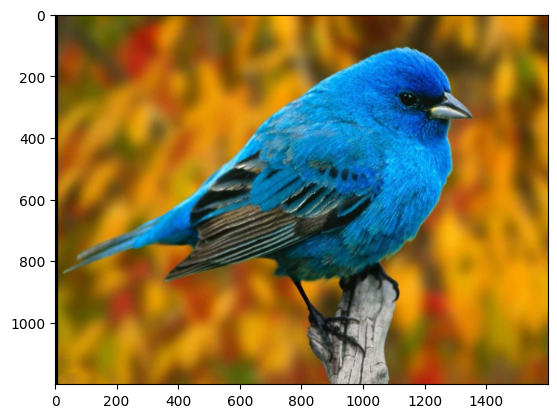

In [15]:
T = np.float32([[1, 0, 10], [0, 1, 0]]) 
img_translation = cv2.warpAffine(train_img, T, train_img.shape[1::-1])

plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
plt.show()

- изменить яркость изоббражения

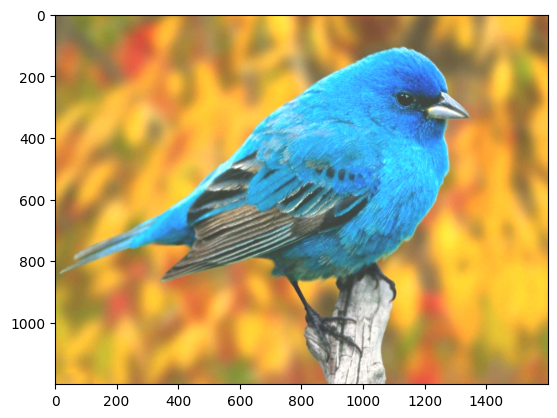

In [16]:
alpha = 1 # Contrast control (1.0-3.0)
beta = 50 # Brightness control (0-100)

brightness = cv2.convertScaleAbs(train_img, alpha=alpha, beta=beta)

plt.imshow(cv2.cvtColor(brightness, cv2.COLOR_BGR2RGB))
plt.show()

- изменить контрасть изображения

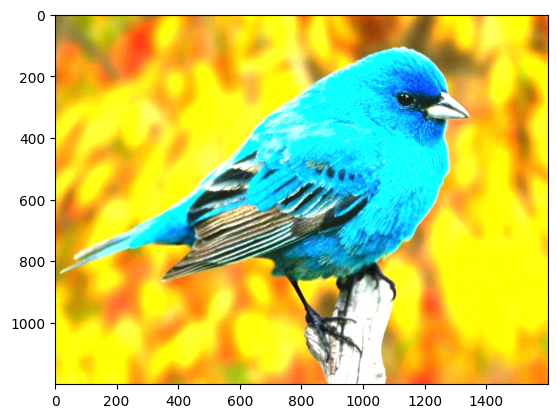

In [17]:
alpha = 2 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

contrast = cv2.convertScaleAbs(train_img, alpha=alpha, beta=beta)

plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB))
plt.show()

- сделать гамма-перобразование

In [18]:
def gamma_correction(image, gamma=1.0):
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    return gamma_corrected

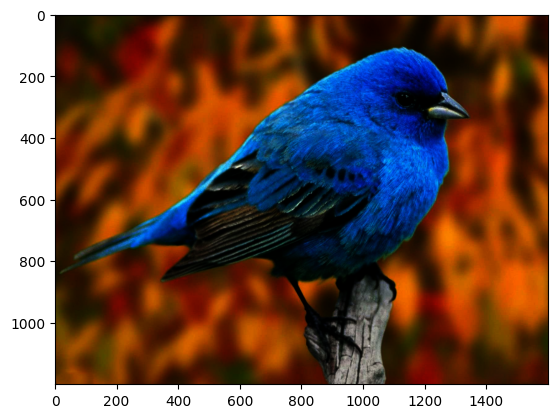

In [19]:
gamma = gamma_correction(train_img, 2.2)
plt.imshow(cv2.cvtColor(gamma, cv2.COLOR_BGR2RGB))
plt.show()

- сделать гистограмную эквайлизацию

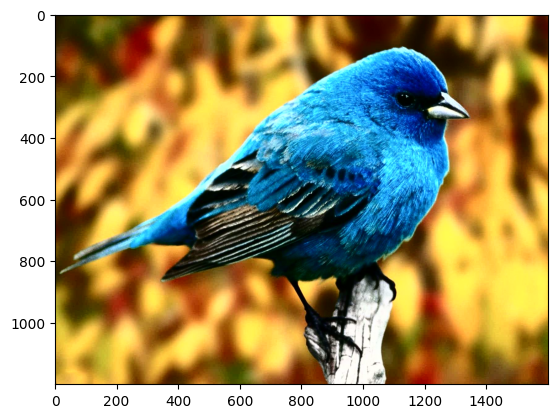

In [20]:
ycrcb_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2YCrCb)

# equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

# convert back to RGB color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.show()

- изменить баланс белого, сделать более "теплую" картинку


In [21]:
def WB(img, k = 1):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * k)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * k)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

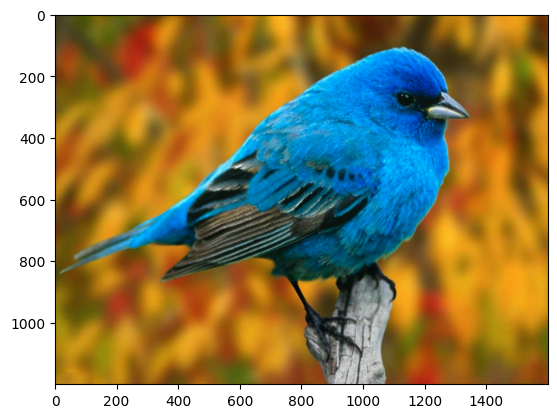

In [22]:
balanced = WB(train_img, 0.1)
plt.imshow(cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB))
plt.show()

- изменить баланс белого, сделать более "холодную" картинку

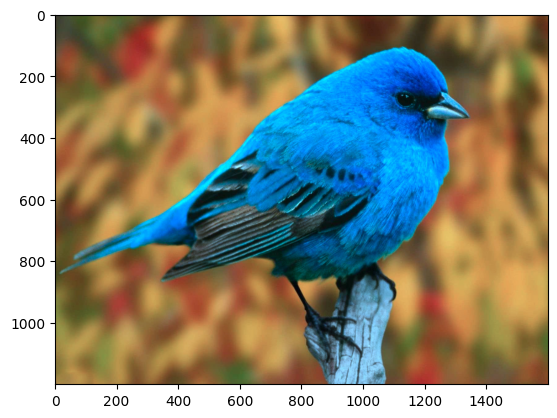

In [23]:
balanced = WB(train_img, 1.2)
plt.imshow(cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB))
plt.show()

- изменить цветовую палитру по заданному шаблону


In [24]:
# template = train_img[200:400, 1000:1200, :]
# plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
# plt.show()

# # Find the correlation between the image and the template
# res = cv2.matchTemplate(train_img, template, method=cv2.TM_CCOEFF)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# top_left = max_loc
# w, h = template.shape[0], template.shape[1]
# bottom_right = (top_left[0] + w, top_left[0] + h)
# rec = cv2.rectangle(train_img, top_left, bottom_right, 255, 1)
# plt.imshow(cv2.cvtColor(rec, cv2.COLOR_BGR2RGB))
# plt.show()

- сделать бинаризацию изображения

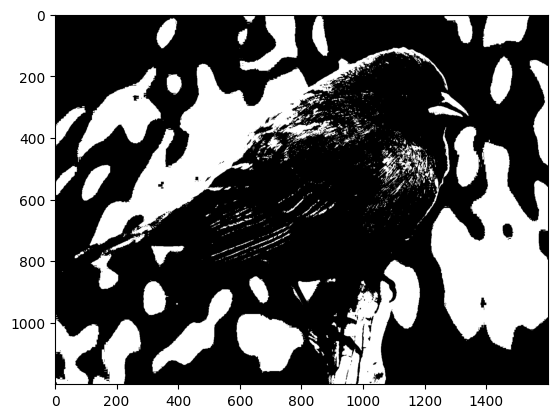

In [25]:
gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

- найти контуры на бинаризированном изображении

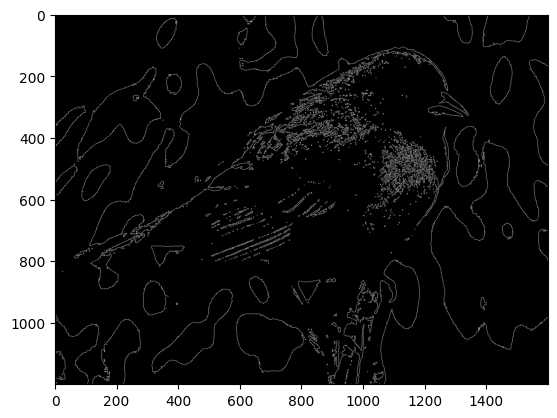

In [26]:
# Setting parameter values 
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 

# Applying the Canny Edge filter 
edge = cv2.Canny(thresh, t_lower, t_upper) 

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.show()

- нати контуры на изображении, применив фильтры (Собеля или Лапласиан)

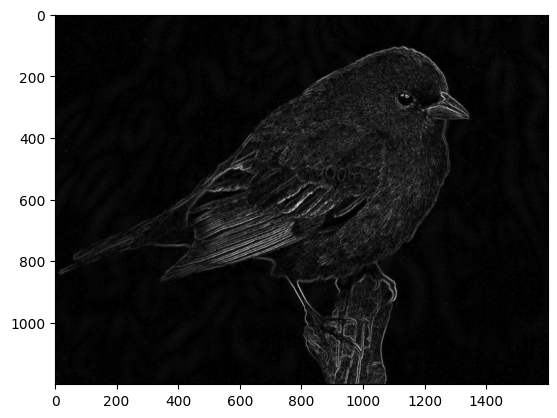

In [27]:
x = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=3, scale=1)
y = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5, 0)

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.show()

- сделать размытие изображения

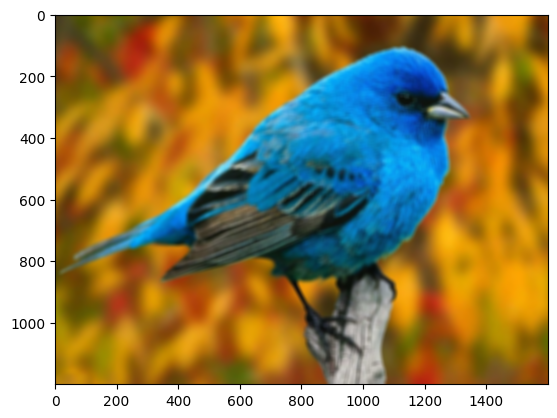

In [28]:
ksize = (15, 15) 
blur = cv2.blur(train_img, ksize)

plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

- сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только медленные частоты

In [29]:
dft = np.fft.fft2(train_img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create circle mask
radius = 32
mask = np.zeros_like(train_img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

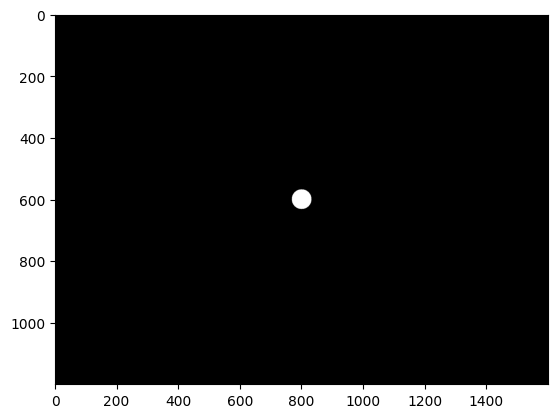

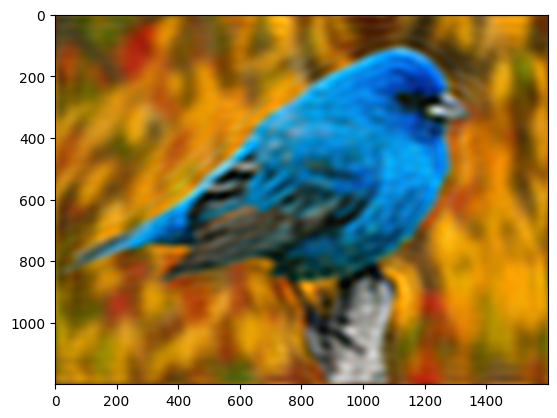

In [30]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.show()

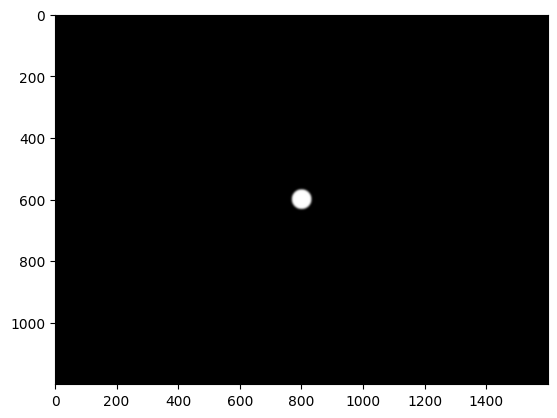

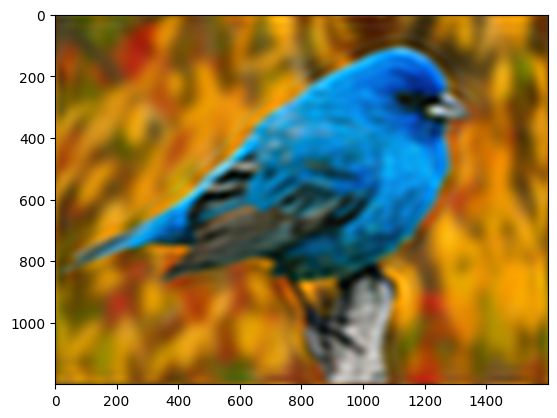

In [31]:
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_filtered2, cv2.COLOR_BGR2RGB))
plt.show()

- сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только быстрые частоты

In [32]:
# do dft saving as complex output
dft = np.fft.fft2(train_img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create white circle mask on black background and invert so black circle on white background
radius = 32
mask = np.zeros_like(train_img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
mask = 255 - mask

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
# multiply by 3 to increase brightness
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(3*img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(3*img_filtered2).clip(0,255).astype(np.uint8)

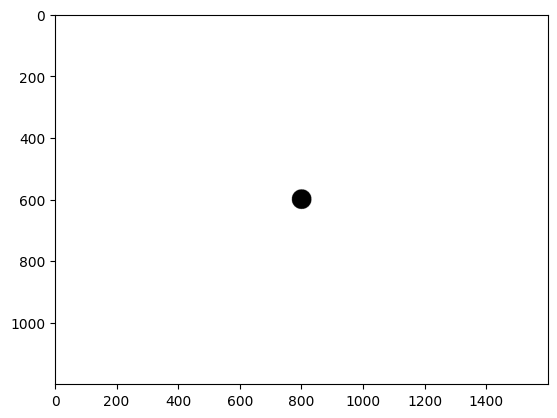

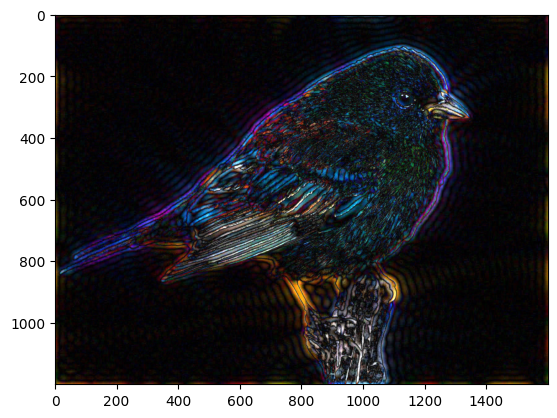

In [33]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.show()

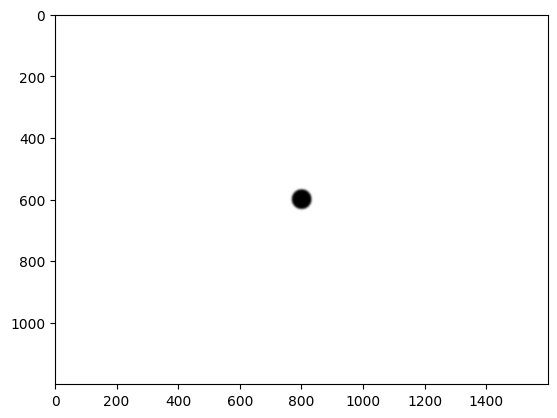

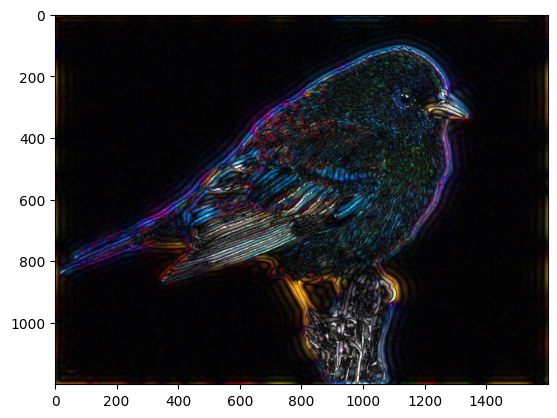

In [34]:
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_filtered2, cv2.COLOR_BGR2RGB))
plt.show()

- применить операцию эрозии к изображению

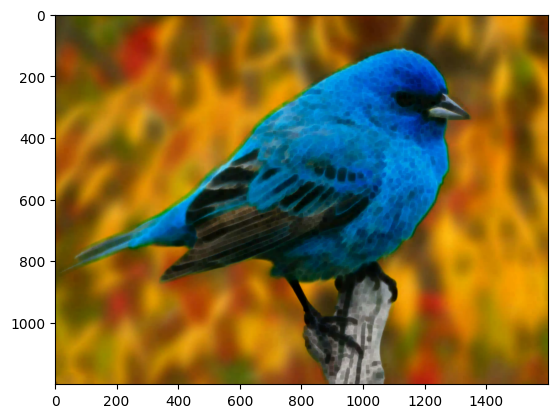

In [35]:
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(train_img, kernel, iterations=2) 

plt.imshow(cv2.cvtColor(img_erosion, cv2.COLOR_BGR2RGB))
plt.show()

- применить операцию диляции к изображению

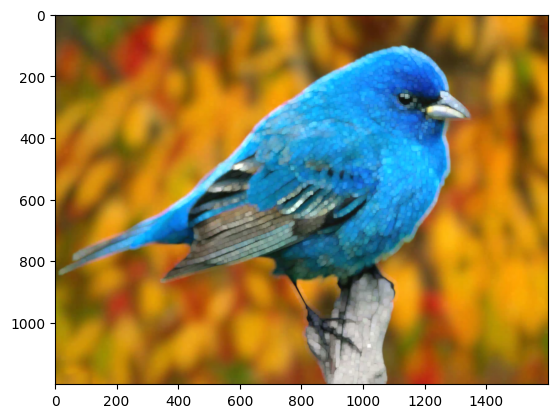

In [36]:
img_dilation = cv2.dilate(train_img, kernel, iterations=2)
plt.imshow(cv2.cvtColor(img_dilation, cv2.COLOR_BGR2RGB))
plt.show()